In [1]:
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from astropy.io import fits

bn = '150314205'
det = 'n9'
binwidth = 0.064
viewt1 = -10
viewt2 = 20


databasedir = '/db/Data/Fermi_GBM_burst/data/'
year = '20'+bn[0:2]
datadir = databasedir+'/'+year+'/bn'+bn
ttefile = glob(datadir+'/'+'glg_tte_'+det+'_bn'+bn+'_v*.fit')
assert len(ttefile) == 1
hdu = fits.open(ttefile[0])
trigtime = hdu['Primary'].header['TRIGTIME']
data = hdu['EVENTS'].data
time = data.field(0)-trigtime
ch = data.field(1)

time1 =  time[(ch >= 20) & (ch <= 40)]
time2 =  time[(ch >= 40) & (ch <= 80)]
tbins = np.arange(viewt1,viewt2+binwidth,binwidth)
counts1, _ = np.histogram(time1,bins=tbins)
counts2, _ = np.histogram(time2,bins=tbins)
counts_forplot1 = np.concatenate(([counts1[0]],counts1))
counts_forplot2 = np.concatenate(([counts2[0]],counts2))

fig, axes = plt.subplots(2,1,figsize=(10, 12),sharex=True,sharey=False)
axes[0].plot(tbins,counts_forplot1,drawstyle='steps')
axes[1].plot(tbins,counts_forplot2,drawstyle='steps')
plt.savefig('./lc.png')
plt.close()

In [3]:
r, r_p_value = stats.pearsonr(counts1, counts2); print(r, r_p_value)
rho, rho_p_value = stats.spearmanr(counts1, counts2); print(rho, rho_p_value)
tau, tau_p_value = stats.kendalltau(counts1, counts2); print(tau, tau_p_value)

0.9552520130876286 3.453785968096523e-249
0.8310278839876554 4.7984927529075e-121
0.6636877792522149 4.3355749984866485e-98


In [48]:
def plot_ccf(counts1, counts2):
    assert len(counts1) == len(counts2)
    N_halfwindow = round(len(counts1)*0.25)
    i_Center =  round(len(counts1)*0.5)
    ccf = np.array([
        [j,*stats.pearsonr(counts1[i_Center-N_halfwindow:i_Center+N_halfwindow], 
                         counts2[i_Center-N_halfwindow+j:i_Center+N_halfwindow+j])] 
                                     for j in np.arange(-N_halfwindow,N_halfwindow)
    ])
    return ccf
z = plot_ccf(counts1, counts2)
x = z[:,0]
y = z[:,1]
p = z[:,2]
x_max = x[np.argmax(y)]
print('lag =',x_max*binwidth,'s')

lag = -0.128 s


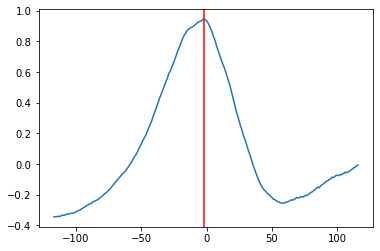

In [49]:
plt.plot(x,y)
plt.axvline(x_max,color='r')

In [50]:
def plot_ccf(counts1, counts2):
    assert len(counts1) == len(counts2)
    N_halfwindow = round(len(counts1)*0.25)
    i_Center =  round(len(counts1)*0.5)
    ccf = np.array([
        [j,*stats.kendalltau(counts1[i_Center-N_halfwindow:i_Center+N_halfwindow], 
                         counts2[i_Center-N_halfwindow+j:i_Center+N_halfwindow+j])] 
                                     for j in np.arange(-N_halfwindow,N_halfwindow)
    ])
    return ccf
z = plot_ccf(counts1, counts2)
x = z[:,0]
y = z[:,1]
p = z[:,2]
x_max = x[np.argmax(y)]
print('lag =',x_max*binwidth,'s')

lag = -0.064 s


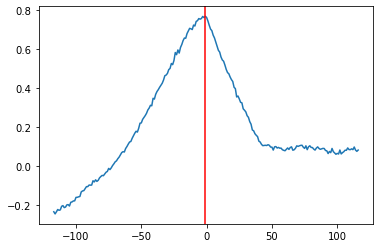

In [51]:
plt.plot(x,y)
plt.axvline(x_max,color='r')

(0.01, 0.1)

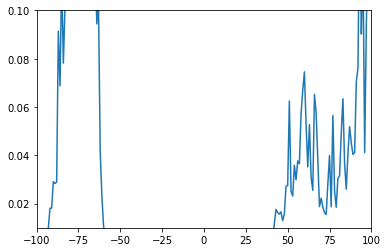

In [35]:
plt.plot(x,p)
plt.xlim(-100,100)
plt.ylim(0.01,0.1)